In [1]:
import numpy as np

In [5]:
def f(x): # функция, которую аппроксимируем
    return np.sin(x / 5.0)*np.exp(x / 10.0) + 5*np.exp( -x / 2 )

In [2]:
?np.sin

In [3]:
?np.exp

In [6]:
f(1)

3.252216865271419

In [7]:
f(15)

0.6352214195786656

In [8]:
x = np.linspace(1, 15)
y = f(x)

In [10]:
%matplotlib inline
from matplotlib import pylab as plt

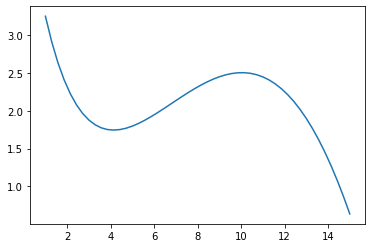

In [11]:
plt.plot(x, y)
plt.show()

## Приближение многочленом первой степени (прямой)

In [34]:
# Выбираем точки
x1 = 1
x2 = 15

In [35]:
A = np.array([[1, x1],[1, x2]])
print(A)

[[ 1  1]
 [ 1 15]]


In [36]:
b = np.array([f(x1), f(x2)])
print(b)

[3.25221687 0.63522142]


In [18]:
import scipy.linalg

In [37]:
w = scipy.linalg.solve(A, b)
print(w)

[ 3.43914511 -0.18692825]


In [19]:
scipy.linalg.solve()

Object `scipy.linalg.solve()` not found.


In [21]:
def linf(x, w): # w - массив коэффициентов многочлена
    return w[1]*x+w[0]

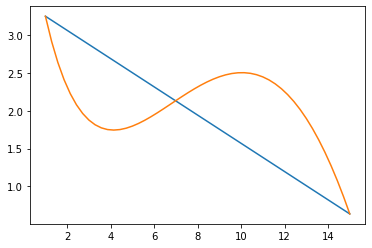

In [38]:
z = linf(x, w)
plt.plot(x, z)
plt.plot(x, y)
plt.show()

## Приближение многочленом второй степени (параболой)

In [50]:
# Выбираем точки
x1 = 1
x2 = 4
x3 = 15

In [51]:
A = np.array([[1, x1, x1 ** 2],[1, x2, x2 ** 2],[1, x3, x3 ** 2]])
print(A)

[[  1   1   1]
 [  1   4  16]
 [  1  15 225]]


In [52]:
b = np.array([f(x1), f(x2), f(x3)])
print(b)

[3.25221687 1.74684595 0.63522142]


In [53]:
w = scipy.linalg.solve(A, b)
print(w)

[ 3.86850246 -0.64490942  0.02862382]


In [43]:
def sqf(x, w):
    return w[0]+w[1] * x + w[2] * (x ** 2) 

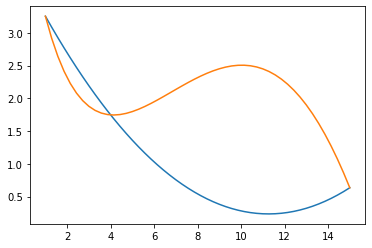

In [54]:
z = sqf(x, w)
plt.plot(x, z)
plt.plot(x, y)
plt.show()

In [ ]:
# построить семейство парабол для разных значений серединной точки

## Приближение многочленом третьей степени (кубической параболой)

In [55]:
# Выбираем точки
x1 = 1
x2 = 4
x3 = 10
x4 = 15

In [56]:
A = np.array([[1, x1, x1 ** 2, x1 ** 3],[1, x2, x2 ** 2, x2 ** 3],[1, x3, x3 ** 2, x3 ** 3], [1, x4, x4 ** 2, x4 ** 3]])
print(A)

[[   1    1    1    1]
 [   1    4   16   64]
 [   1   10  100 1000]
 [   1   15  225 3375]]


In [57]:
b = np.array([f(x1), f(x2), f(x3), f(x4)])
print(b)

[3.25221687 1.74684595 2.50541641 0.63522142]


In [58]:
w = scipy.linalg.solve(A, b)
print(w)

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


In [59]:
def trf(x, w):
    return w[0]+w[1] * x + w[2] * (x ** 2) + w[3] * (x ** 3)

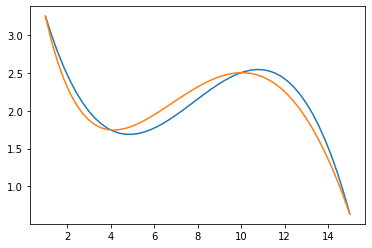

In [60]:
z = trf(x, w)
plt.plot(x, z)
plt.plot(x, y)
plt.show()

In [61]:
print(np.round(w, decimals=2))

[ 4.36 -1.3   0.19 -0.01]


## Приближение многочленом произвольной степени $n$

1. Импортируем необходимые библиотеки: numpy, scipy, matlpotlib, а также указываем, что графики необходимо строить в этом же документе:

In [114]:
import numpy as np 
%matplotlib inline
from matplotlib import pylab as plt
import scipy.linalg

2. Определяем функцию, которую необходимо аппроксимировать (математические функцие используются из numpy для работы с массивами, в одномерном случае это необязательно)

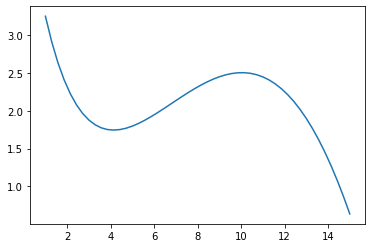

In [115]:
def f(x): # функция, которую аппроксимируем
    return np.sin(x / 5.0)*np.exp(x / 10.0) + 5*np.exp( -x / 2 )

x = np.linspace(1, 15) # построение графика
y = f(x)

plt.plot(x, y)
plt.show()

3. Вводим степень многочена:

In [139]:
n = 4  # степень многочлена

x_n = np.linspace(1, 15, n+1) # выбираем точки, через которые будет прохожить многочлен. (Здаесь выбираются равномерно)
#x_n = [1, 4, 10, 15]
#print(x_n)

A = [] # матрицы коэффициентов линейного уравнения
for j in range(n+1): # для каждой из n+1 точек
    A.append([x_n[j] ** i for i in range(n+1)]) # набираем степени (от 0 до n) с помощью генератора
#print(A)

A = np.array(A)
#print(A)

b = np.array([f(x_n[i]) for i in range(n+1)]) # вычисляем значение функции в выбранных точках (всего n+1 точка)
#print(b)

w = scipy.linalg.solve(A, b) # решаем систему линейных уравнений и получаем коэффициенты многочлена ($w_0, w_n$)
# print(w)

In [140]:
def poly(x, w): # определяем фунцию, которая возвращает знаечение многочлена с массивом коэфиициентов w при фикисрованном x
    res = 0
    for i in range(len(w)):
        #print(i, w[i])
        res += w[i] * (x ** i) # умножаем коэффициент на x в нужной степени
    return res

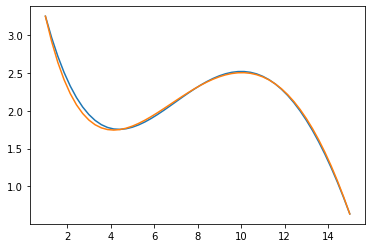

In [141]:
z = poly(x, w) # строим графики и сравниваем аппроксимант с функцией
plt.plot(x, z)
plt.plot(x, y)
plt.show()

In [111]:
temp = [x_n[3] ** i for i in range(n+1)]
print(temp)

[1.0, 11.5, 132.25, 1520.875, 17490.0625]


In [112]:
%timeit ny = f(x)

11.6 µs ± 91.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [113]:
%timeit nz = poly(x, w)

34.4 µs ± 549 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
